# Simulação de Atendimento

## Bibliotecas necessárias

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from random import expovariate
from numba import jit
from tqdm import tqdm
from collections import defaultdict

# Para documentacao do codigo
from typing import List

## Implementações

### Simulação

In [2]:
@jit(nopython=False)
def simulacao(n_guiches: int, lambd: int, taxa_atendimento: float, t_max: int) -> List[int]:
    """Realiza uma simulacao e retorna a quantidade
    de requicioes aceitas e rejeitadas.
    """
    tc = k = x = y = r = tm = 0
    gtdisp = np.zeros(n_guiches)
    ctcheg = dict()
    z = expovariate(lambd)

    while tc + z <= t_max:
        tc += z
        k += 1
        ctcheg[k] = tc
        
        while gtdisp.min() <= tc and x < k:
            x += 1
            j = np.argmin(gtdisp)
            a = expovariate(taxa_atendimento)
            gtdisp[j] = max(gtdisp[j], ctcheg[x]) + a
            tm = max(tm, (gtdisp[j] - ctcheg[x]))
        
        r = max(0, (k - 1) - x)
        pr = r/(r+n_guiches)
        s = np.random.binomial(n=1, p=pr)
        
        if s == 1:
            k -= 1
            y += 1
        
        r = k - x
        w = y/(x + y + r)
    return x, y, w

In [3]:
def rep_simulacao(n_guiches: int, lambd: int, taxa_atendimento: float, t_max: int, N: int) -> List[List[int]]:
    """Realiza N simulacoes e retorna a lista de 
    requisicoes aceitas e rejeitadas em cada simulacao
    """
    X = np.array(list())
    Y = np.array(list())
    W = np.array(list())
    np_append = np.append
    
    for i in range(N):
        x, y, w = simulacao(n_guiches, lambd, taxa_atendimento, t_max)
        X = np_append(X, x)
        Y = np_append(Y, y)
        W = np_append(W, w)

    return X, Y, W

## Parâmetros

In [4]:
n_guiches = 6
taxa_atendimento = 1/2
lambd = 3
t_max = 50
N = 1000

## Experimento

In [5]:
X, Y, W = rep_simulacao(n_guiches, lambd, taxa_atendimento, t_max, N)

In [6]:
print(f"Média de requisições aceitas: {X.mean()}")
print(f"Média de requisições rejeitadas: {Y.mean()}")
print(f"Proporção de requisições rejeitadas: {W.mean()}")

Média de requisições aceitas: 128.165
Média de requisições rejeitadas: 1083.04
Proporção de requisições rejeitadas: 0.3602169154667106


## Visualização dos resultados

### Histograma de requisições aceitas e rejeitadas



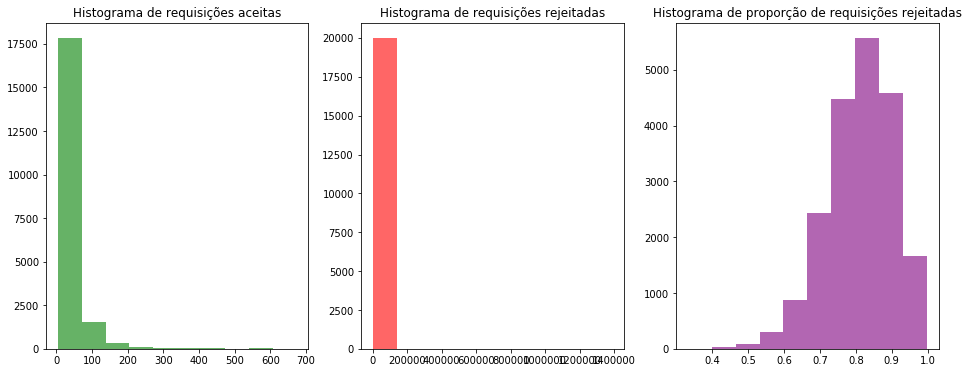

In [50]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 6))
ax1.hist(X, alpha=.6, color='green')
ax1.set_title('Histograma de requisições aceitas')
ax2.hist(Y, alpha=.6, color='red')
ax2.set_title('Histograma de requisições rejeitadas')
ax3.hist(W, alpha=.6, color='purple')
ax3.set_title('Histograma de proporção de requisições rejeitadas')
plt.show()

### Convergência da média de requisições rejeitadas

In [51]:
iters = list(range(100, N, 100))
E = list()

for i in range(len(iters)):
    last_iter = iters[i]
    E.append(sum(W[1:last_iter]/last_iter))

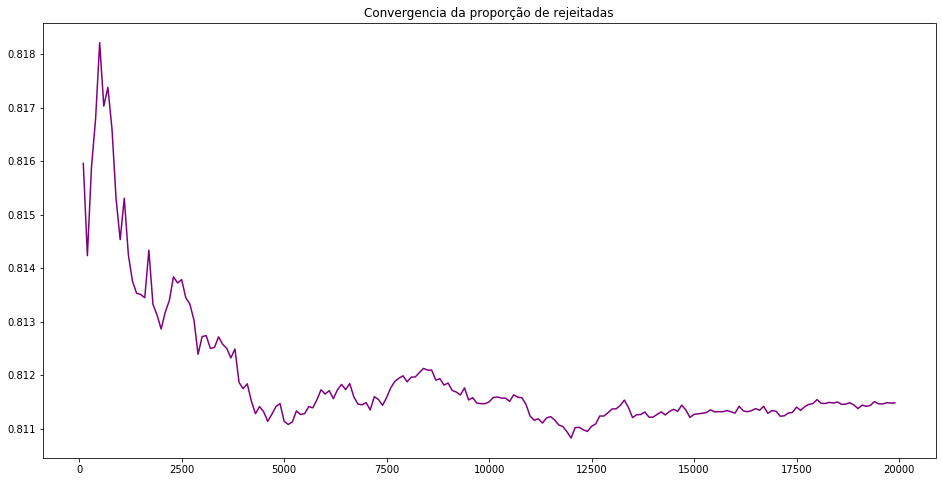

In [52]:
fig, axes = plt.subplots(1,  figsize=(16, 8))
plt.plot(iters, E, color='purple')
plt.title('Convergencia da proporção de rejeitadas')
plt.show()